In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [3]:
list_item = []
for col in df.columns :
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns = 'Feature DataType Null NullPct UniqueNum UniqueSample'.split())
desc_df

,Feature,DataType,Null,NullPct,UniqueNum,UniqueSample
0,Unnamed: 0,int64,0,0.000000,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.000000,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.000000,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.000000,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.071429,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.000000,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.000000,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.000000,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

# Feature Engineering

In [5]:
# Fix data type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Membership duration
df['member_duration'] = 2022 - df['Dt_Customer'].dt.year

# Age
df['age'] = 2022 - df['Year_Birth']

# Number of kids
df['total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['total_kids'] > 0, 1, 0)

#Age Grouping
age_list = []
for i in df['age']:
    if i >=1 and i <=12:
        group = 'Childs'
    elif i >=13 and i <=17:
        group = 'Teens'
    elif i >=18 and i <=30:
        group = 'Young Adults'
    elif i >=31 and i <=50:
        group = 'Middle-aged Adults'
    else:
        group = 'Old Adults'
    age_list.append(group)
df['age_group'] = age_list

# Total spending
df['total_spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Total accepted campaigns
df['total_accepted_campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Total transaction purchased
df['total_transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Conversion rate
def cvr(x,y):
    if y == 0:
        return 0
    return x / y

df['conversion_rate'] = round(df.apply(lambda x: cvr(x['total_transaction'],x['NumWebVisitsMonth']), axis=1), 2)

# EDA

In [6]:
#selecting features 
dfnew = df[['ID','Education','Marital_Status','Income','Recency','NumWebVisitsMonth','age','total_kids','is_parents','age_group','member_duration','total_spent','total_accepted_campaigns','total_transaction','conversion_rate']]
dfnew.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,age,total_kids,is_parents,age_group,member_duration,total_spent,total_accepted_campaigns,total_transaction,conversion_rate
0,5524,S1,Lajang,58138000.0,58,7,65,0,0,Old Adults,10,1617000,0,25,3.57
1,2174,S1,Lajang,46344000.0,38,5,68,2,1,Old Adults,8,27000,0,6,1.20
2,4141,S1,Bertunangan,71613000.0,26,4,57,0,0,Old Adults,9,776000,0,21,5.25
3,6182,S1,Bertunangan,26646000.0,26,6,38,1,1,Middle-aged Adults,8,53000,0,8,1.33
4,5324,S3,Menikah,58293000.0,94,5,41,1,1,Middle-aged Adults,8,422000,0,19,3.80


In [7]:
#dividing into category and numerical features
category = dfnew.select_dtypes(include='object')
numerical = dfnew.select_dtypes(exclude='object')

numerical_feat = numerical.columns.to_list()
category_feat = category.columns.to_list()

In [8]:
#statistical summary of numerical features
dfnew[numerical_feat].describe()

,ID,Income,Recency,NumWebVisitsMonth,age,total_kids,is_parents,member_duration,total_spent,total_accepted_campaigns,total_transaction,conversion_rate
count,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,5592.159821,5.224725e+07,49.109375,5.316518,53.194196,0.950446,0.715179,8.971875,6.057982e+05,0.297768,14.862054,4.395170
std,3246.662198,2.517308e+07,28.962453,2.426645,11.984069,0.751803,0.451430,0.684554,6.022493e+05,0.678381,7.677173,4.913677
min,0.000000,1.730000e+06,0.000000,0.000000,26.000000,0.000000,0.000000,8.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,2828.250000,3.530300e+07,24.000000,3.000000,45.000000,0.000000,0.000000,9.000000,6.875000e+04,0.000000,8.000000,1.220000
50%,5458.500000,5.138150e+07,49.000000,6.000000,52.000000,1.000000,1.000000,9.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,8427.750000,6.852200e+07,74.000000,7.000000,63.000000,1.000000,1.000000,9.000000,1.045500e+06,0.000000,21.000000,5.347500
max,11191.000000,6.666660e+08,99.000000,20.000000,129.000000,3.000000,1.000000,10.000000,2.525000e+06,4.000000,44.000000,43.000000


there are null values in **Income** feature

In [9]:
#statistical summary of categorical features
dfnew[category_feat].describe()

,Education,Marital_Status,age_group
count,2240,2240,2240
unique,5,6,3
top,S1,Menikah,Old Adults
freq,1127,864,1240


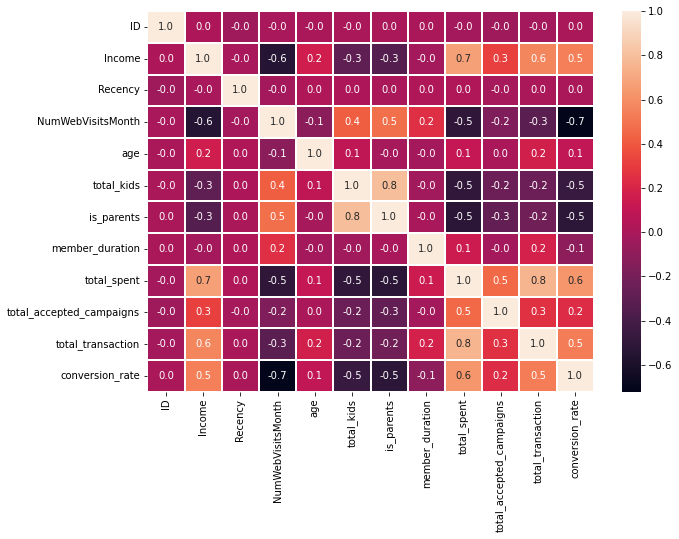

In [10]:
#Correlation
plt.figure(figsize=(10,7))
sns.heatmap(dfnew.corr(),annot=True, fmt='.1f',linewidth=0.1)
plt.show()

* conversion_rate have a strong positive correlation with total_spent, total_transaction, and income 
* age have a weak positive correlation with conversion_rate
* total_spent and total_transaction have a strong correlation with income

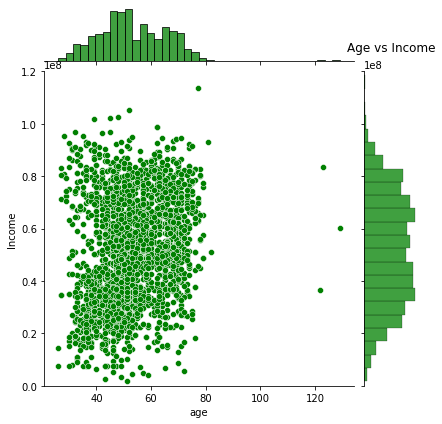

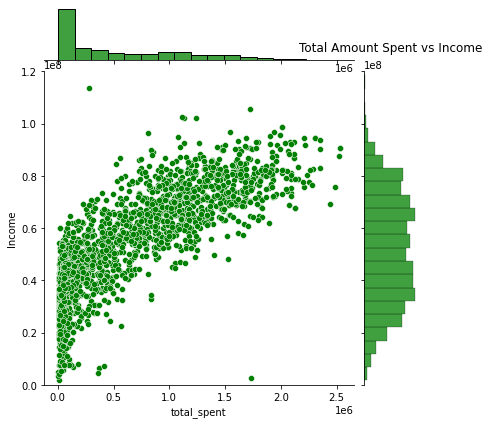

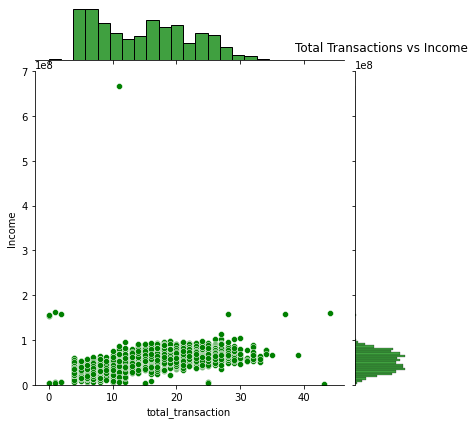

In [11]:
# age, total spent and total transaction vs income
sns.jointplot(x=df["age"], y=df["Income"], color = 'green')
plt.title('Age vs Income', fontsize=12, pad = 20)
plt.ylim(0, 120000000)

sns.jointplot(x=df["total_spent"], y=df["Income"], color = 'green')
plt.title('Total Amount Spent vs Income', fontsize=12, pad = 20)
plt.ylim(0, 120000000)

sns.jointplot(x=df["total_transaction"], y=df["Income"], color = 'green')
plt.title('Total Transactions vs Income', fontsize=12, pad = 20)
plt.ylim(0,700000000)
plt.show()

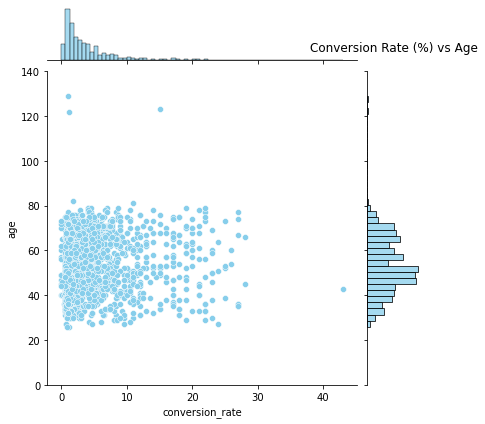

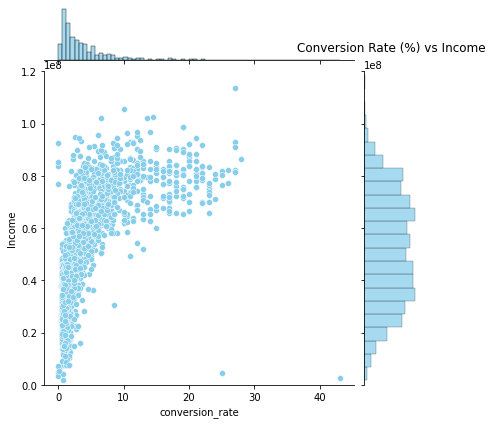

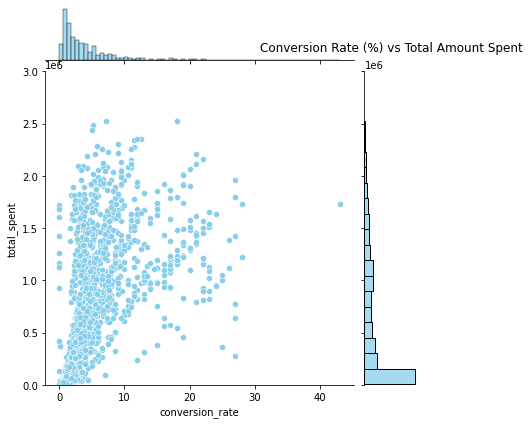

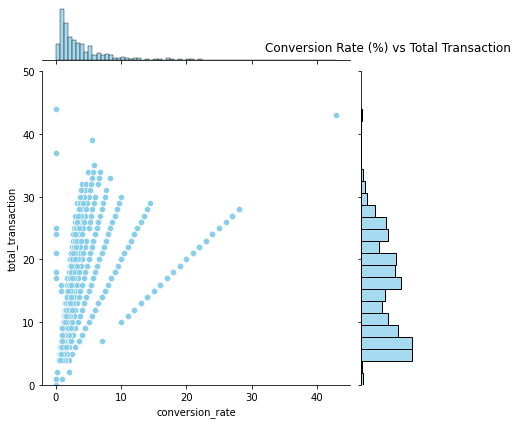

In [12]:
#covnersion_rate vs age, Income, total_spent, and total_transactions 

sns.jointplot(x=df["conversion_rate"], y=df["age"], color = 'skyblue')
plt.title('Conversion Rate (%) vs Age', fontsize=12, pad = 20)
plt.ylim(0, 140)

sns.jointplot(x=df["conversion_rate"], y=df["Income"], color = 'skyblue')
plt.title('Conversion Rate (%) vs Income', fontsize=12, pad = 20)
plt.ylim(0, 120000000)

sns.jointplot(x=df["conversion_rate"], y=df["total_spent"], color = 'skyblue')
plt.title('Conversion Rate (%) vs Total Amount Spent', fontsize=12, pad = 20)
plt.ylim(0, 3000000)

sns.jointplot(x=df["conversion_rate"], y=df["total_transaction"], color = 'skyblue')
plt.title('Conversion Rate (%) vs Total Transaction', fontsize=12, pad = 20)
plt.ylim(0, 50)

plt.show()

**Insights**

* The higher the income, the higher the ability to buy more products, which will increase the number of transactions, the total money spent, and the conversion rate.
* Age does not have a significant effect to the increase of the conversion rate. This is probably because the increase of age does not clearly represents the increase of income

# Data Preprocessing

In [13]:
dfclean = dfnew.copy()
dfclean.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,age,total_kids,is_parents,age_group,member_duration,total_spent,total_accepted_campaigns,total_transaction,conversion_rate
0,5524,S1,Lajang,58138000.0,58,7,65,0,0,Old Adults,10,1617000,0,25,3.57
1,2174,S1,Lajang,46344000.0,38,5,68,2,1,Old Adults,8,27000,0,6,1.20
2,4141,S1,Bertunangan,71613000.0,26,4,57,0,0,Old Adults,9,776000,0,21,5.25
3,6182,S1,Bertunangan,26646000.0,26,6,38,1,1,Middle-aged Adults,8,53000,0,8,1.33
4,5324,S3,Menikah,58293000.0,94,5,41,1,1,Middle-aged Adults,8,422000,0,19,3.80


In [14]:
list_item = []
for col in dfclean.columns :
    list_item.append([col, dfclean[col].dtype, dfclean[col].isna().sum(), 100*dfclean[col].isna().sum()/len(dfclean[col]), dfclean[col].nunique(), dfclean[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns = 'Feature DataType Null NullPct UniqueNum UniqueSample'.split())
desc_df

,Feature,DataType,Null,NullPct,UniqueNum,UniqueSample
0,ID,int64,0,0.000000,2240,"[5524, 2174, 4141, 6182, 5324]"
1,Education,object,0,0.000000,5,"[S1, S3, S2, SMA, D3]"
2,Marital_Status,object,0,0.000000,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
3,Income,float64,24,1.071429,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
4,Recency,int64,0,0.000000,100,"[58, 38, 26, 94, 16]"
5,NumWebVisitsMonth,int64,0,0.000000,16,"[7, 5, 4, 6, 8]"
6,age,int64,0,0.000000,59,"[65, 68, 57, 38, 41]"
7,total_kids,int64,0,0.000000,4,"[0, 2, 1, 3]"
8,is_parents,int32,0,0.000000,2,"[0, 1]"
9,age_group,object,0,0.000000,3,"[Old Adults, Middle-aged Adults, Young Adults]"


In [15]:
dfclean.duplicated().any()

False

**Observation** 

* There are missing values from 'Income' feature and will be dropped since its only 1% from the data
* There is no duplicated row from the dataset
* Some features will be dropped 
* There are some incorrect values for 'Marital_Status' feature

In [16]:
# Handling null values
df_clean = dfclean[dfclean['age'] < 80].copy()
df_clean = df_clean.dropna()
df_clean.isna().sum()

ID                          0
Education                   0
Marital_Status              0
Income                      0
Recency                     0
NumWebVisitsMonth           0
age                         0
total_kids                  0
is_parents                  0
age_group                   0
member_duration             0
total_spent                 0
total_accepted_campaigns    0
total_transaction           0
conversion_rate             0
dtype: int64

In [17]:
# label encoder for education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df_clean['education_mapped'] = df_clean['Education'].map(mapping_education)

#label encoder for marital status
mapping_marital_status = {
    'Lajang' : 0,
    'Duda' : 0,
    'Janda' : 0,
    'Cerai' : 0,
    'Bertunangan' : 1,
    'Menikah' : 1
}
df_clean['marital_status_mapped'] = df_clean['Marital_Status'].map(mapping_marital_status)


In [18]:
df_clean = df_clean.drop(['ID', 'Education','Marital_Status','member_duration', 'age_group'], axis = 1)

In [70]:
df_clean.head()

,Income,Recency,NumWebVisitsMonth,age,total_kids,is_parents,total_spent,total_accepted_campaigns,total_transaction,conversion_rate,education_mapped,marital_status_mapped,cluster
0,58138000.0,58,7,65,0,0,1617000,0,25,3.57,2,0,0
1,46344000.0,38,5,68,2,1,27000,0,6,1.20,2,0,1
2,71613000.0,26,4,57,0,0,776000,0,21,5.25,2,1,0
3,26646000.0,26,6,38,1,1,53000,0,8,1.33,2,1,1
4,58293000.0,94,5,41,1,1,422000,0,19,3.80,4,1,2


# Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_clean.copy()
ss = StandardScaler()

df_scaled = ss.fit_transform(df_scaled)
dfscaled = pd.DataFrame(df_scaled, columns = df_clean.columns)

In [20]:
dfscaled

,Income,Recency,NumWebVisitsMonth,age,total_kids,is_parents,total_spent,total_accepted_campaigns,total_transaction,conversion_rate,education_mapped,marital_status_mapped
0,0.235182,0.312056,0.691502,1.023256,-1.266403,-1.584148,1.679367,-0.438700,1.318303,-0.167270,-0.457617,-1.350465
1,-0.233404,-0.379387,-0.133376,1.280291,1.404095,0.631254,-0.963189,-0.438700,-1.159022,-0.652454,-0.457617,-1.350465
2,0.770556,-0.794253,-0.545815,0.337830,-1.266403,-1.584148,0.281638,-0.438700,0.796761,0.176657,-0.457617,0.740486
3,-1.016023,-0.794253,0.279063,-1.290056,0.068846,0.631254,-0.919978,-0.438700,-0.898251,-0.625841,-0.457617,0.740486
4,0.241340,1.556654,-0.133376,-1.033022,0.068846,0.631254,-0.306705,-0.438700,0.535990,-0.120185,1.536060,0.740486
...,...,...,...,...,...,...,...,...,...,...,...,...
2206,0.357752,-0.102810,-0.133376,0.166474,0.068846,0.631254,1.220659,-0.438700,0.405605,-0.161129,-0.457617,0.740486
2207,0.468641,0.242912,0.691502,1.965717,2.739343,0.631254,-0.270141,1.033174,0.927147,-0.255300,1.536060,0.740486
2208,0.189213,1.452938,0.279063,-1.033022,-1.266403,-1.584148,1.054461,1.033174,0.535990,-0.249158,-0.457617,-1.350465
2209,0.676473,-1.416552,-0.958254,1.108935,0.068846,0.631254,0.392991,-0.438700,1.057532,0.672077,0.539222,0.740486


# Modelling

## Elbow Method K-Means Clustering

<AxesSubplot:title={'center':'Elbow Method of K-means Clustering'}>

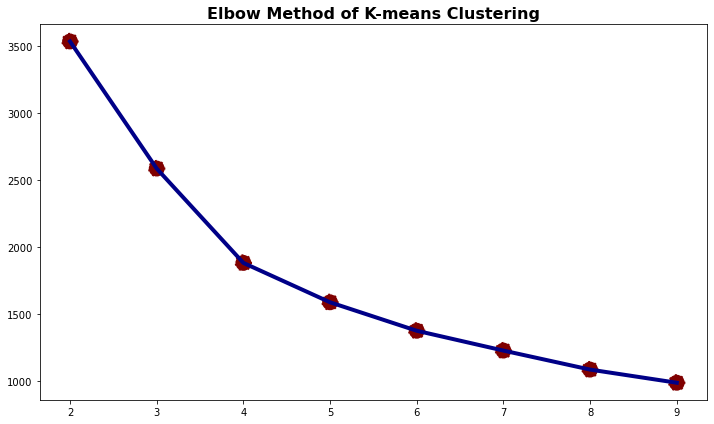

In [82]:
from sklearn.cluster import KMeans
X = dfscaled[['Recency','total_transaction','total_spent']]
inertia = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=142)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.title('Elbow Method of K-means Clustering', fontsize=16, fontweight='bold')
plt.tight_layout()
#plt.savefig('kmeans', dpi=200)

sns.lineplot(x=range(2, 10), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 10), y=inertia, s=300, color='#800000',  linestyle='--')

## Silhouette Score

In [83]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=142)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.title('Silhouette Score of K-means Clustering', fontsize=16, fontweight='bold')
    plt.tight_layout()
    #plt.savefig('silhouette score', dpi=200)

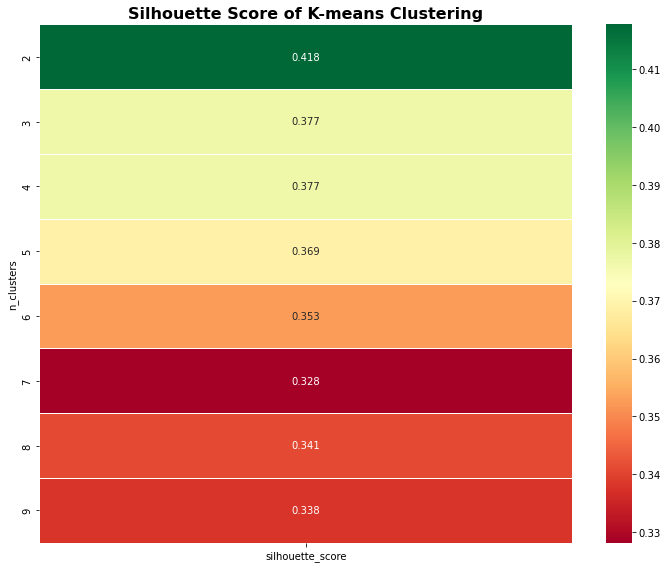

In [84]:
visualize_silhouette_layer(X)

In [85]:
kmeans = KMeans(n_clusters=3, random_state=142)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df_clean['cluster'] = kmeans.labels_

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10284/281146979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


In [86]:
df_clean['cluster'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "cluster": "total_customers"})

,clusters,total_customers
0,0,933
1,1,655
2,2,623


In [87]:
df_clean.groupby('cluster').agg({'Recency': 'mean',
                                 'total_transaction':'mean',
                                 'total_spent': 'mean'})

,Recency,total_transaction,total_spent
cluster,,,
0,49.058950,22.147910,1.201160e+06
1,23.664122,9.444275,1.647618e+05
2,75.455859,9.743178,1.805169e+05


# Interpretation

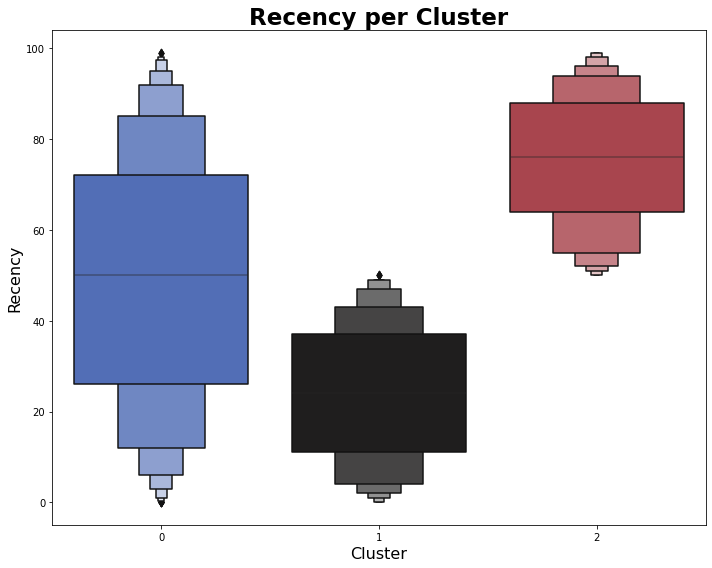

In [88]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_clean['cluster'], y=df_clean['Recency'], palette='icefire')
plt.title('Recency per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Recency', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()
#plt.savefig('income per cluster', dpi=200)

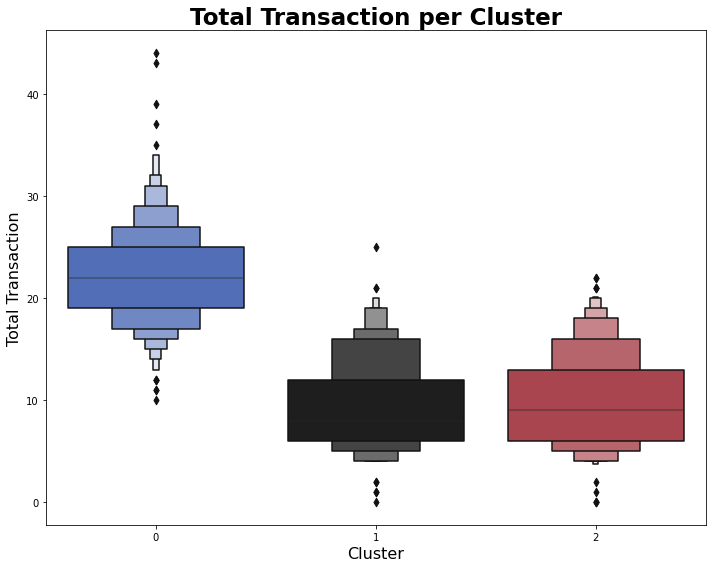

In [89]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_clean['cluster'], y=df_clean['total_transaction'], palette='icefire')
plt.title('Total Transaction per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total Transaction', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()
#plt.savefig('income per cluster', dpi=200)

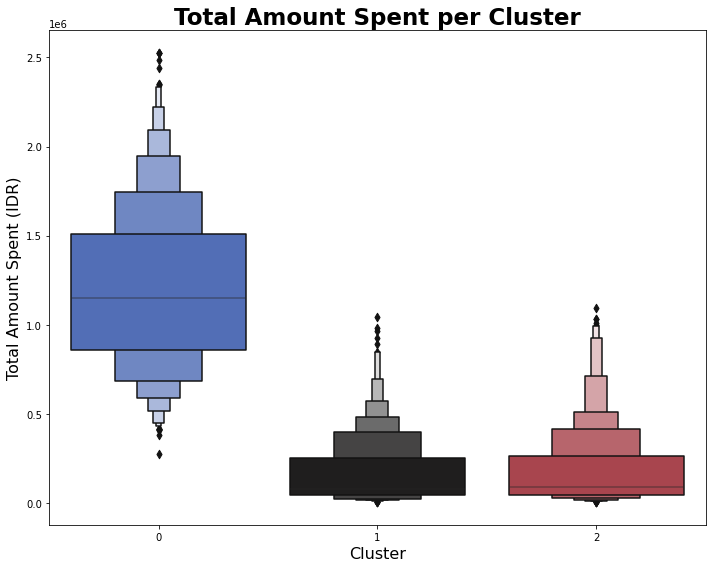

In [90]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x=df_clean['cluster'], y=df_clean['total_spent'], palette='icefire')
plt.title('Total Amount Spent per Cluster', fontsize=23, fontweight='bold')
plt.ylabel('Total Amount Spent (IDR)', fontsize=16)
plt.xlabel('Cluster', fontsize=16)
plt.tight_layout()
#plt.savefig('income per cluster', dpi=200)

# Summary

Based on the principle of RFM (Recency, Frequency, and Monetary), there are 3 clusters that represents the behavior of customers.

* Cluster 0 is a cluster with the most population. They are a group that does not make purchases very often but they are able to achieve the highest frequency in making transactions. This may be because they buy more items at one time or subsequently buy repeated items for the given time period, which makes them the most spenders. They probably have the financial capability to do so.
* Cluster 1 is the most recent purchasers. They have the lowest frequency of transaction, making them the lowest spenders. This is probably because they only interested to buy items due to the specific campaign given to them. This kind of behavior could happen in a condition where the capaign is like a discount offer for selected items in a certain period of time.
* Cluster 2 rarely make purchases but their frequency of transaction and the amount of money that they spend is sightly higher than cluster 2